# **Price Prediction on Used Car using Machine Learning**


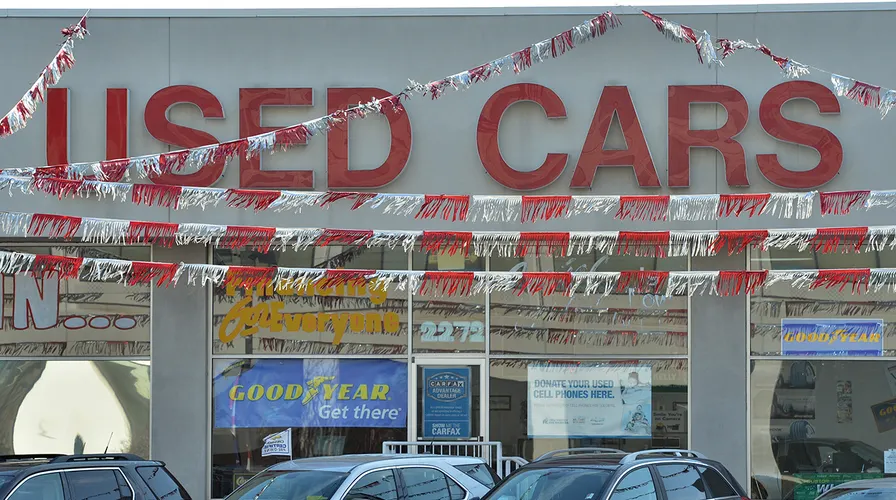


- Dataset Used: [US Used Cars Dataset(3 million Cars)](https://https://www.kaggle.com/ananaymital/us-used-cars-dataset)

- We'll train the machine learning model to predict the price of a second hand car in USA given the information like Engine Power, Car Make, Car Condition, Seller Rating, Selling location, Seating Capacity etc.

- In this project, we analyse the [US Used Cars Dataset(3 million Cars)](https://https://www.kaggle.com/ananaymital/us-used-cars-dataset), which has information about '3 million' cars listed in the Used Car Market in US.

- The dataset has 3 million rows and 66 columns

- To run this notebook, select "Run" > "Run on Colab" and connect your Google Drive account with Jovian. Make sure to use the GPU runtime if you plan on using a GPU.

## Download the Dataset

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas



Dataset link: https://www.kaggle.com/ananaymital/us-used-cars-dataset


### Install Required Libraries

In [2]:
!pip install numpy pandas jovian opendatasets scikit-learn xgboost --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 328.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import jovian

In [4]:
jovian.commit(project="machinelearning-project")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


### Download Data from Kaggle

We'll use the opendatasets library: https://github.com/JovianML/opendatasets

In [5]:
import opendatasets as od

In [6]:
dataset_url = 'https://www.kaggle.com/ananaymital/us-used-cars-dataset' #Dataset used in the project

In [7]:
import opendatasets as od
od.download(dataset_url) #Downloading the dataset

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: richardsamuel26
Your Kaggle Key: ··········


100%|██████████| 2.13G/2.13G [00:27<00:00, 82.6MB/s]

In [8]:
data_dir = 'us-used-cars-dataset'

In [9]:
import os
os.listdir(data_dir)

['used_cars_data.csv']

### View Dataset Files

In [10]:
!ls -lh {data_dir}

total 9.3G
-rw-r--r-- 1 root root 9.3G Aug  4 17:06 used_cars_data.csv


In [11]:
!head {data_dir}/used_cars_data.csv

vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
ZACNJABB5KPJ92081,35.1 in,,,,SUV / Crossover,,Bayamon,,,522,00960,"[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EVAP M-AIR,Full Size Temporary Use Spare Tire,Manufacturer's Statement of Origin,Quick Order Package 2XB,Tires: 215/60R

## Loading Training Set

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

We can apply these optimizations while using [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [12]:
import pandas as pd

In [13]:
import numpy as np

In [14]:
df_csv = 'us-used-cars-dataset/used_cars_data.csv'

In [15]:
selected_cols = ['body_type','city','daysonmarket','fuel_type','latitude','longitude','make_name','price','seller_rating','transmission','wheel_system','year']
selected_cols

['body_type',
 'city',
 'daysonmarket',
 'fuel_type',
 'latitude',
 'longitude',
 'make_name',
 'price',
 'seller_rating',
 'transmission',
 'wheel_system',
 'year']

In [16]:
dtypes = {
'daysonmarket' : 'int32',
 'latitude' : 'float32',
 'longitude' : 'float32',
 'price' : 'float32',
 'seller_rating' : 'float32',
 'year' : 'float32'
}

### Load Test Set

For the test set, we'll simply provide the data types.

In [17]:
%%time
df = pd.read_csv(df_csv, usecols=selected_cols, dtype=dtypes, nrows=150000)

CPU times: user 4.14 s, sys: 309 ms, total: 4.44 s
Wall time: 6.58 s


### Load Test Set


In [18]:
df

body_type           city  daysonmarket          fuel_type  \
0       SUV / Crossover        Bayamon           522           Gasoline   
1       SUV / Crossover       San Juan           207           Gasoline   
2                 Sedan       Guaynabo          1233           Gasoline   
3       SUV / Crossover       San Juan           196           Gasoline   
4       SUV / Crossover       San Juan           137           Gasoline   
...                 ...            ...           ...                ...   
149995     Pickup Truck       Branford           173           Gasoline   
149996  SUV / Crossover  West Simsbury           274           Gasoline   
149997            Sedan        Norwood            94           Gasoline   
149998     Pickup Truck     Portsmouth            49  Flex Fuel Vehicle   
149999  SUV / Crossover  West Simsbury            33           Gasoline   

         latitude  longitude   make_name    price  seller_rating transmission  \
0       18.398800 -66.158203        Jeep  23141.0       2.800000            A   
1       18.443899 -66.078499  Land Rover  46500.0       3.000000            A   
2       18.346701 -66.109802      Subaru  46995.0            NaN            M   
3       18.443899 -66.078499  Land Rover  67430.0       3.000000            A   
4       18.443899 -66.078499  Land Rover  48880.0       3.000000            A   
...           ...        ...         ...      ...            ...          ...   
149995  41.278702 -72.845001       Honda  43140.0       3.444444            A   
149996  41.818802 -72.870003       Honda  22799.0       4.285714          CVT   
149997  42.174900 -71.193604     Hyundai  21412.0       3.607143            A   
149998  43.085602 -70.793404        Ford  25630.0       4.500000            A   
149999  41.818802 -72.870003       Honda  22395.0       4.285714          CVT   

       wheel_system    year  
0               FWD  2019.0  
1               AWD  2020.0  
2               AWD  2016.0  
3               AWD  2020.0  
4               AWD  2020.0  
...             ...     ...  
149995          AWD  2020.0  
149996          AWD  2020.0  
149997          FWD  2020.0  
149998          4X2  2020.0  
149999          AWD  2017.0  

[150000 rows x 12 columns]

## 2. Explore the Dataset

- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization
- Ask & answer questions

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   body_type      149398 non-null  object 
 1   city           150000 non-null  object 
 2   daysonmarket   150000 non-null  int32  
 3   fuel_type      146468 non-null  object 
 4   latitude       150000 non-null  float32
 5   longitude      150000 non-null  float32
 6   make_name      150000 non-null  object 
 7   price          150000 non-null  float32
 8   seller_rating  149085 non-null  float32
 9   transmission   148548 non-null  object 
 10  wheel_system   143480 non-null  object 
 11  year           150000 non-null  float32
dtypes: float32(5), int32(1), object(6)
memory usage: 10.3+ MB


In [ ]:
df.isna().sum()

body_type         602
city                0
daysonmarket        0
fuel_type        3532
latitude            0
longitude           0
make_name           0
price               0
seller_rating     915
transmission     1452
wheel_system     6520
year                0
dtype: int64

In [ ]:
df.describe()

daysonmarket       latitude      longitude         price  \
count  150000.000000  150000.000000  150000.000000  1.500000e+05   
mean       79.053527      41.600368     -74.948776  3.043424e+04   
std       113.399101       1.252842       4.897731  2.010757e+04   
min         0.000000      18.346701    -157.901993  7.770000e+02   
25%        14.000000      40.855900     -74.296700  1.849500e+04   
50%        36.000000      41.743198     -73.619797  2.708000e+04   
75%        83.000000      42.456501     -71.720100  3.841725e+04   
max      2500.000000      61.172001     -66.078499  1.390000e+06   

       seller_rating           year  
count  149085.000000  150000.000000  
mean        4.151800    2017.614258  
std         0.547466       3.797446  
min         1.000000    1930.000000  
25%         3.800000    2017.000000  
50%         4.250000    2019.000000  
75%         4.555555    2020.000000  
max         5.000000    2021.000000

In [ ]:
df.nunique()

body_type            9
city              1157
daysonmarket       937
fuel_type            7
latitude          2277
longitude         2288
make_name           61
price            34804
seller_rating      755
transmission         4
wheel_system         5
year                69
dtype: int64

In [ ]:
df.shape

(150000, 12)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


# **Exploratory Analysis and Visualization**


In [20]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

## Types of Car

In [ ]:
fig = px.histogram(df,
              title = "Different Types of Car ",
              x = 'body_type',
              color= "body_type",
            )
fig.update_layout(xaxis_title = "Car Type",
                  yaxis_title = "Type Counts",
                  legend_title = "Type of Cars",)

The above visualization shows that **SUV/Crossover** are sold high in market and second highest sold car is **Sedan**.
  - SUV/Crossover~52k units
  - Sedan ~27k units
  - Other type of car are sold on average of ~2-5k units

## Transmission in Cars

In [ ]:
transmission = df['transmission'].value_counts()

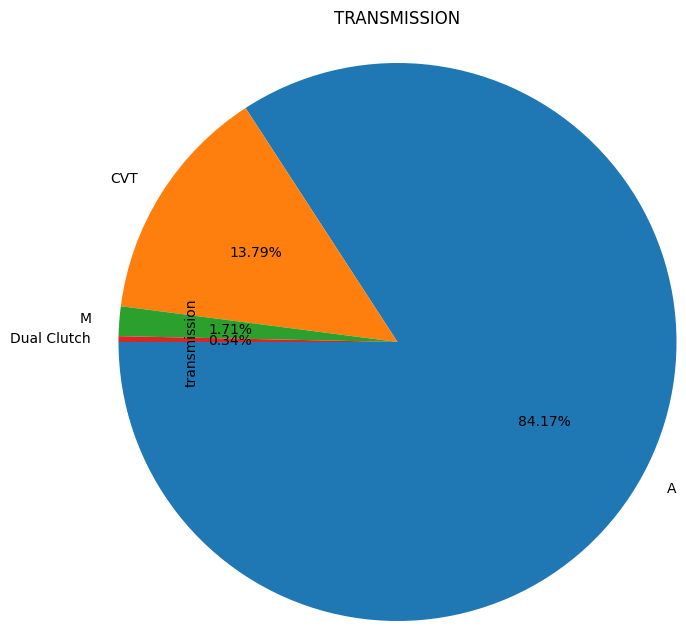

In [ ]:
transmission.plot.pie(autopct='%1.2f%%',radius=1.8,figsize=(5,10),startangle=180);
plt.title('TRANSMISSION', y= 1.3);

So we can see **Automatic Transmission** vehicle are listed high for preowned sales and automatic transmission cars are mostly preferred by a customers in this region followed by CVT and others

## Car Brand available for Sale

In [24]:
px.histogram(df, x='make_name', title='Car Brand available for Sale')

As we can see  brands like Ford, Chevrolet, Toyota definitely have high number of cars being sold in the market, and luxury brands like Maybach,McLaren,Ferrari,etc have a very few number of cars in the preowned sale market.


## Price distribution of cars

In [ ]:
fig = px.histogram(df, x='price', marginal='box', title='Price Distribution of Cars')
fig.update_layout(bargap=0.1)
fig.show()

As we can see majority of cars sold in market prices around 16-72k and some luxury brand cars which are listed are sold at high price expect others are outliers

## Fuel vs Transmission

In [ ]:
px.violin(df, x='transmission', y='fuel_type', title='Fuel_types vs Transmission')

- As we can see mostly petrol cars are listed for preowned sale this is because of the efficiency and reliability of diesel cars
- Electric cars are new to market so they are not listed on high numbers.
- Speaking of Hybird they are also new to market and these cars runs on combination petrol and battery due to high price on battery pack the customer is not prefering hybird cars on preowned sale

## Number of days in the market

In [ ]:
fig = px.histogram(df, x="daysonmarket", marginal="box", title='Number of days in the market')
fig.update_layout(yaxis_title = 'Count')
fig.show()

The graphs shows that 80% of cars are sold within 60-70 days and with median being 36 days. So clearly we can see there are car which are not sold even after 1000 days these are said to be outliers.

## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

## Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df,test_df = train_test_split(df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (90000, 12)
val_df.shape : (30000, 12)
test_df.shape : (30000, 12)


## Extract Inputs and Outputs

In [ ]:
df.columns

Index(['body_type', 'city', 'daysonmarket', 'fuel_type', 'latitude',
       'longitude', 'make_name', 'price', 'seller_rating', 'transmission',
       'wheel_system', 'year'],
      dtype='object')

In [ ]:
input_cols = ['body_type','city','daysonmarket','latitude','longitude',
       'fuel_type','make_name','year','transmission',
       'wheel_system']

In [ ]:
target_col = 'price'

### Training

In [ ]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [ ]:
train_inputs

body_type               city  daysonmarket   latitude  \
60584   SUV / Crossover         Great Neck             7  40.774101   
122394  SUV / Crossover         Manchester           160  42.989399   
4554    SUV / Crossover          Patchogue            63  40.782700   
11386   SUV / Crossover         Somerville           335  40.580101   
14557             Sedan         Bloomfield            48  41.822899   
...                 ...                ...           ...        ...   
49713   SUV / Crossover         Massapequa             7  40.677502   
87939   SUV / Crossover    North Kingstown            20  41.598301   
138288            Sedan         Shrewsbury           616  42.276901   
78493   SUV / Crossover  Manchester Center           146  43.183399   
8980       Pickup Truck        Center Line            37  42.485802   

        longitude fuel_type      make_name    year transmission wheel_system  
60584  -73.732597  Gasoline  Mercedes-Benz  2018.0            A          AWD  
122394 -71.461700  Gasoline           Jeep  2015.0            A          4WD  
4554   -73.008499  Gasoline           Jeep  2011.0          CVT          FWD  
11386  -74.601799  Gasoline           Ford  2020.0            A          AWD  
14557  -72.709999  Gasoline        Hyundai  2016.0            A          FWD  
...           ...       ...            ...     ...          ...          ...  
49713  -73.452003  Gasoline        Hyundai  2017.0            A          AWD  
87939  -71.496498  Gasoline        Hyundai  2021.0            A          NaN  
138288 -71.725304  Gasoline  Mercedes-Benz  2009.0            A          RWD  
78493  -73.045799  Gasoline          Acura  2011.0            A          AWD  
8980   -83.027603       NaN      Chevrolet  2018.0          NaN          4WD  

[90000 rows x 10 columns]

In [ ]:
train_targets

60584     26995.0
122394    15267.0
4554       6495.0
11386     23405.0
14557      9990.0
           ...   
49713     12980.0
87939     26230.0
138288    26991.0
78493     10499.0
8980      37500.0
Name: price, Length: 90000, dtype: float32

### Validation

In [ ]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [ ]:
val_inputs

body_type              city  daysonmarket   latitude  longitude  \
137096  SUV / Crossover         Rochester            24  42.673199 -83.133400   
146773  SUV / Crossover       Brattleboro            56  42.888500 -72.554398   
110854            Sedan   East Providence            48  41.820702 -71.364197   
90494             Sedan           Walpole            32  42.121498 -71.272598   
87603   SUV / Crossover  Sterling Heights           180  42.588100 -83.030800   
...                 ...               ...           ...        ...        ...   
43753             Sedan      East Windsor            31  41.881901 -72.608002   
101618        Hatchback           Lincoln           201  41.954300 -71.488098   
69686   SUV / Crossover         Rhinebeck            29  41.957199 -73.893997   
90286   SUV / Crossover          Stamford           300  41.074001 -73.565300   
109619  SUV / Crossover           Norwood            11  42.201599 -71.187401   

       fuel_type  make_name    year transmission wheel_system  
137096  Gasoline   Cadillac  2020.0            A          4WD  
146773  Gasoline      Buick  2016.0            A          AWD  
110854  Gasoline    Hyundai  2017.0            A          FWD  
90494   Gasoline   INFINITI  2015.0            A          RWD  
87603   Gasoline       Jeep  2020.0            A          4WD  
...          ...        ...     ...          ...          ...  
43753   Gasoline     Toyota  2012.0            A          FWD  
101618  Gasoline      Honda  2020.0          CVT          FWD  
69686   Gasoline  Chevrolet  2018.0            A          4WD  
90286   Gasoline    Lincoln  2020.0            A          AWD  
109619  Gasoline      Honda  2019.0          CVT          AWD  

[30000 rows x 10 columns]

In [ ]:
val_targets

137096    55619.0
146773    13755.0
110854    14416.0
90494     19475.0
87603     36811.0
           ...   
43753      8400.0
101618    17945.0
69686     18900.0
90286     58210.0
109619    25925.0
Name: price, Length: 30000, dtype: float32

### Test

In [ ]:
test_inputs = test_df[input_cols]
test_targets = test_df[target_col]

In [ ]:
test_inputs

body_type           city  daysonmarket   latitude  longitude  \
59770   SUV / Crossover      Waterford            27  42.659901 -83.404602   
21362         Hatchback        Clifton            25  40.869400 -74.183601   
127324     Pickup Truck      Haverhill           180  42.769600 -71.116096   
140509     Pickup Truck       Columbus            40  39.885101 -82.968399   
144297            Sedan       Cranston            27  41.748501 -71.452301   
...                 ...            ...           ...        ...        ...   
30430   SUV / Crossover           Novi            12  42.493801 -83.533897   
63244   SUV / Crossover       St James           611  40.861401 -73.142601   
104970  SUV / Crossover        Norwood           291  42.201599 -71.187401   
53960             Sedan  Richmond Hill            78  40.696899 -73.815300   
49315             Sedan   Little Falls            41  40.884998 -74.214302   

                fuel_type  make_name    year transmission wheel_system  
59770            Gasoline       Ford  2017.0            A          FWD  
21362            Gasoline        Kia  2017.0            A          FWD  
127324           Gasoline        GMC  2020.0            A          4WD  
140509  Flex Fuel Vehicle       Ford  2019.0            A          4WD  
144297           Gasoline       Ford  2020.0          CVT          FWD  
...                   ...        ...     ...          ...          ...  
30430            Gasoline    Lincoln  2020.0            A          AWD  
63244            Gasoline  Chevrolet  2019.0            A          FWD  
104970           Gasoline      Honda  2020.0            A          AWD  
53960            Gasoline    Hyundai  2017.0            A          FWD  
49315            Gasoline     Toyota  2017.0            A          FWD  

[30000 rows x 10 columns]

In [ ]:
test_targets

59770     17000.0
21362     14231.0
127324    40110.0
140509    36991.0
144297    33000.0
           ...   
30430     68190.0
63244     45070.0
104970    23415.0
53960     14980.0
49315     16740.0
Name: price, Length: 30000, dtype: float32

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
print(numeric_cols)

['daysonmarket', 'latitude', 'longitude', 'year']


In [ ]:
print(categorical_cols)

['body_type', 'city', 'fuel_type', 'make_name', 'transmission', 'wheel_system']


## Imputing missing numeric values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean').fit(df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

<ipython-input-44-e9f917d767f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
<ipython-input-44-e9f917d767f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
<ipython-input-44-e9f917d767f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
test_inputs[numeric_cols].isna().sum()

daysonmarket    0
latitude        0
longitude       0
year            0
dtype: int64

## Scaling Numeric Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

<ipython-input-48-a758576da409>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
<ipython-input-48-a758576da409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
<ipython-input-48-a758576da409>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
val_inputs.describe().loc[['min', 'max']]

daysonmarket  latitude  longitude      year
min          0.00  0.000000   0.000457  0.274725
max          0.82  0.678323   1.000000  1.000000

## One-Hot Encoding


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[categorical_cols])

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Streaming output truncated to the last 5000 lines.
<ipython-input-53-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-53-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-53-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

In [ ]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Saving Processed Data to Disk

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [ ]:
!pip install pyarrow --quiet

In [ ]:
%%time
pd.DataFrame(x_train).to_parquet('x_train.parquet')
pd.DataFrame(x_val).to_parquet('x_val.parquet')
pd.DataFrame(x_test).to_parquet('x_test.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 5.11 s, sys: 30.4 ms, total: 5.14 s
Wall time: 5.44 s


In [ ]:
x_train = pd.read_parquet('x_train.parquet')
x_val = pd.read_parquet('x_val.parquet')
x_test = pd.read_parquet('x_test.parquet')
train_targets = pd.read_parquet('train_targets.parquet')
val_targets = pd.read_parquet('val_targets.parquet')
test_targets = pd.read_parquet('test_targets.parquet')

## Train Hardcoded & Baseline Models



## Train & Evaluate Hardcoded Model



In [ ]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [ ]:
mean_model = MeanRegressor()

In [ ]:
mean_model.fit(x_train, train_targets)

In [ ]:
mean_model.mean

price    30382.154297
dtype: float32

In [ ]:
train_preds = mean_model.predict(x_train)

In [ ]:
train_preds

array([30382.154, 30382.154, 30382.154, ..., 30382.154, 30382.154,
       30382.154], dtype=float32)

In [ ]:
val_preds = mean_model.predict(x_val)

In [ ]:
val_preds

array([30382.154, 30382.154, 30382.154, ..., 30382.154, 30382.154,
       30382.154], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

In [ ]:
train_rmse

19765.598

In [ ]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

In [ ]:
val_rmse

20397.158

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


Let's define a helper function to evaluate models and generate test predictions

##  Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Linear Regression
- Random Forests
- Decision Tree
- Gradient Boosting



In [ ]:
def evaluate(model):
    train_preds = model.predict(x_train)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(x_val)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

In [ ]:
def predict(model):
     test_preds = model.predict(x_test)
     test_rmse = mean_squared_error(test_targets, test_preds, squared=False)
     return test_rmse,test_preds

## Linear Regression

In [ ]:
!pip install scikit-learn --quiet

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_1 = LinearRegression()

In [ ]:
model_1.fit(x_train,train_targets)

LinearRegression()

In [ ]:
evaluate(model_1)

(12051.292086889885,
 1521477510363.0984,
 array([[42783.5],
        [26152. ],
        [ 1208. ],
        ...,
        [29985. ],
        [19278. ],
        [49708. ]]),
 array([[52161. ],
        [19202.5],
        [13325.5],
        ...,
        [35096. ],
        [52470. ],
        [30283.5]]))

In [ ]:
predict(model_1)

(998834715049.8347,
 array([[21594. ],
        [18854. ],
        [50828. ],
        ...,
        [37857. ],
        [10158. ],
        [23754.5]]))

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model_2= Ridge()

In [ ]:
model_2.fit(x_train, train_targets)

Ridge()

In [ ]:
evaluate(model_2)

(12065.567876186966,
 13263.916243531965,
 array([[42817.31377699],
        [26190.30804488],
        [ 1404.06674148],
        ...,
        [30152.10693391],
        [19513.38152885],
        [49800.96803643]]),
 array([[52120.47673216],
        [19341.44885982],
        [13313.40273261],
        ...,
        [35088.84316082],
        [52446.06991002],
        [30373.39898336]]))

In [ ]:
predict(model_2)

(13427.846385645154,
 array([[21560.05951412],
        [18878.66712397],
        [50779.0869808 ],
        ...,
        [37891.57449839],
        [10166.87414822],
        [23773.65630576]]))

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_3= DecisionTreeRegressor()

In [ ]:
model_3.fit(x_train, train_targets)

DecisionTreeRegressor()

In [ ]:
evaluate(model_3)

(2784.761479525624,
 12375.439372497684,
 array([26995., 15267.,  6495., ..., 25491., 10499., 37500.]),
 array([52740.25      , 14990.        , 11444.        , ...,
        21000.        , 52113.33333333, 29694.        ]))

In [ ]:
predict(model_3)

(13067.960574788332,
 array([18400.        , 14987.        , 37300.        , ...,
        25700.71428571, 14744.        , 16226.        ]))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_4 = RandomForestRegressor(n_jobs=-1, random_state=42,n_estimators=40,max_depth=10)

In [ ]:
model_4.fit(x_train,train_targets)

<ipython-input-93-9118ac0c96a2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_4.fit(x_train,train_targets)


RandomForestRegressor(max_depth=10, n_estimators=40, n_jobs=-1, random_state=42)

In [ ]:
evaluate(model_4)

(11204.654392915236,
 13425.214638526404,
 array([29549.8744195 , 26584.51317434,  8305.42280789, ...,
        10560.66075378, 11491.15686865, 30418.85727869]),
 array([42078.46334737, 27597.78601452, 15482.22893385, ...,
        29323.76820703, 41183.34174619, 25835.93096975]))

In [ ]:
predict(model_4)

(14182.086257864205,
 array([17340.43347083, 16901.45078389, 41183.34174619, ...,
        41183.34174619, 15325.29771985, 16831.63831858]))

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Gradient Boosting

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_5 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [ ]:
%%time
model_5.fit(x_train, train_targets)

CPU times: user 12min 45s, sys: 780 ms, total: 12min 46s
Wall time: 7min 24s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
evaluate(model_5)

(7841.625,
 11069.417,
 array([38890.594, 18596.27 ,  7724.003, ..., 14620.299, 11339.927,
        35994.258], dtype=float32),
 array([52655.48 , 20698.6  , 14440.769, ..., 28636.555, 56001.44 ,
        27591.348], dtype=float32))

In [ ]:
predict(model_5)

(11907.402,
 array([17744.4  , 15439.833, 55201.953, ..., 37714.41 , 14231.337,
        17375.203], dtype=float32))

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


##  Tune Hyperparmeters

https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76


We'll train parameters for the XGBoost model. Here’s a strategy for tuning hyperparameters:

- Tune the most important/impactful hyperparameter first e.g. n_estimators

- With the best value of the first hyperparameter, tune the next most impactful hyperparameter

- And so on, keep training the next most impactful parameters with the best values for previous parameters...

- Then, go back to the top and further tune each parameter again for further marginal gains

- Hyperparameter tuning is more art than science, unfortunately. Try to get a feel for how the parameters interact with each other based on your understanding of the parameter…

Let's define a helper function for trying different hyperparameters.

In [ ]:
import matplotlib.pyplot as plt
def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(x_train, train_targets)
    train_rmse = mean_squared_error(model.predict(x_train), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(x_val), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], []
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [ ]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

**Hyperparameter Tuning for Gradient Boosting**

In [ ]:
def test_params_1(**params):
    from xgboost import XGBRegressor
    model = XGBRegressor(random_state=42, n_jobs=-1,**params)
    model.fit(x_train, train_targets)
    return evaluate(model), predict(model)

### No. of Trees

CPU times: user 18min 45s, sys: 1.18 s, total: 18min 46s
Wall time: 10min 16s


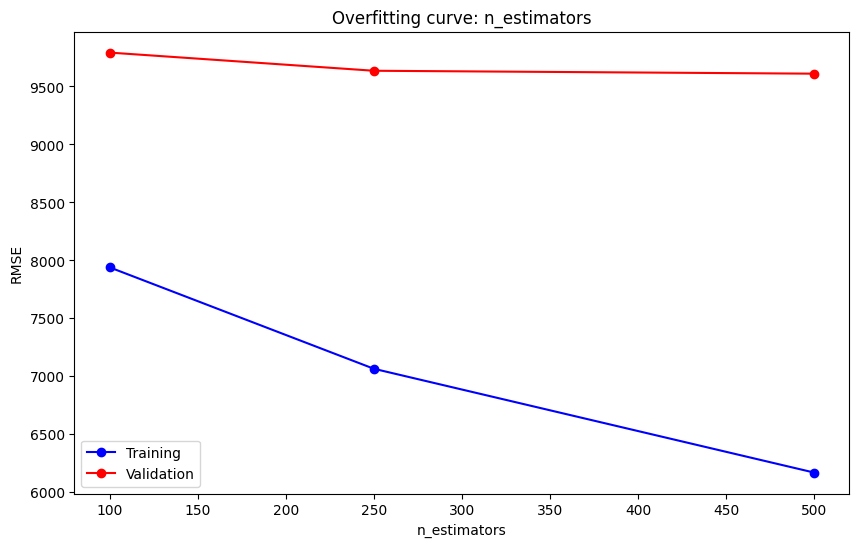

In [ ]:
%%time
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

Seems like 500 estimators has the lowest validation loss. However, it also takes a long time. Let's stick with 250 for now.

In [ ]:
best_params['n_estimators'] = 250

### Max Depth

CPU times: user 11min 12s, sys: 1.29 s, total: 11min 13s
Wall time: 6min 10s


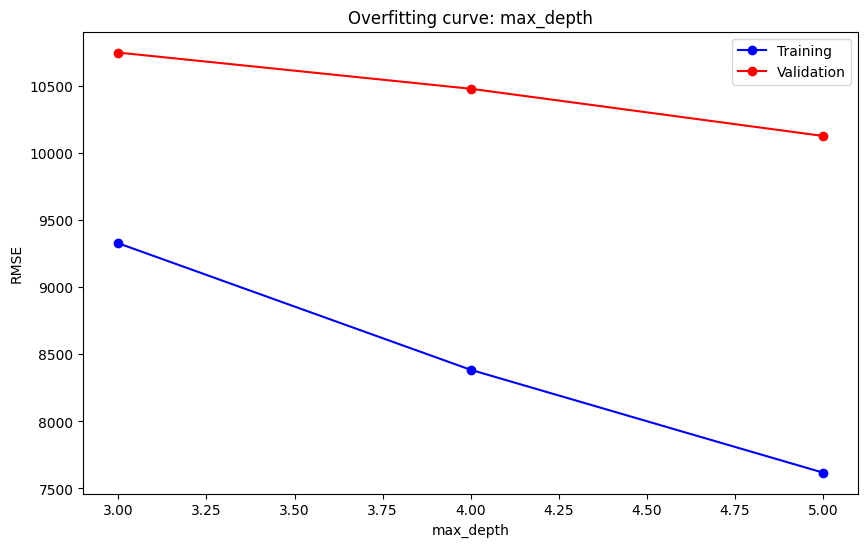

In [ ]:
%%time
test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

In [ ]:
best_params['max_depth'] = 5

### Learning Rate

CPU times: user 13min 49s, sys: 1.16 s, total: 13min 50s
Wall time: 7min 34s


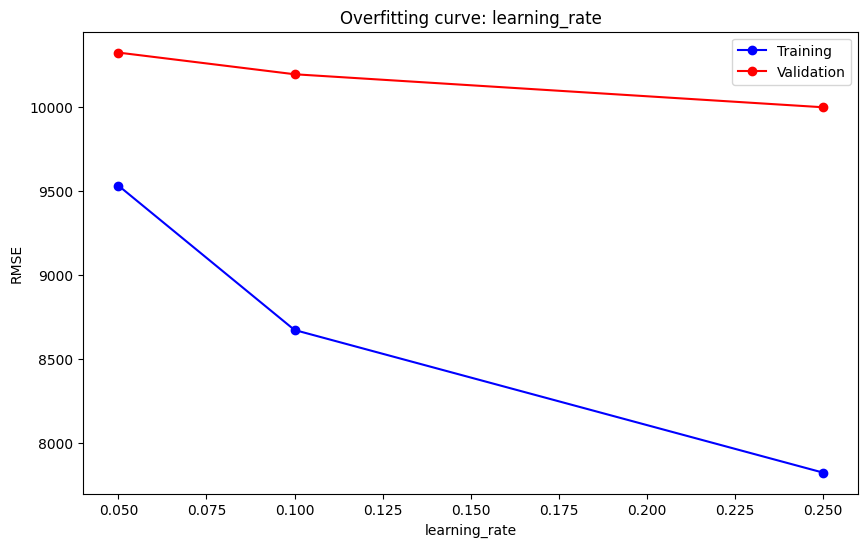

In [ ]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

In [ ]:
best_params['learning_rate'] = 0.25

In [ ]:
%%time
test_params_1(learning_rate =0.25, n_estimators=500, max_depth=5, objective='reg:squarederror')

CPU times: user 52min 30s, sys: 4.19 s, total: 52min 34s
Wall time: 30min 23s


((7170.6216,
  10632.911,
  array([37448.707 , 16830.07  ,  5886.8657, ..., 20183.648 , 11613.4375,
         33673.26  ], dtype=float32),
  array([52103.25 , 17304.455, 14447.614, ..., 26103.826, 55637.805,
         25813.795], dtype=float32)),
 (11816.363,
  array([17230.287, 16409.117, 56390.426, ..., 38436.66 , 12984.084,
         16921.842], dtype=float32)))

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


**Hyperparameter Tuning for Random Forest Model**

In [ ]:
def test_params_2(**params):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(x_train, train_targets)
    return evaluate(model), predict(model)

In [ ]:
test_params_2(max_depth=3, n_estimators=5, max_features = "sqrt")

<ipython-input-112-b07afa92abff>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, train_targets)


((19157.650485217757,
  19833.49199113562,
  array([30001.31783262, 30001.31783262, 28506.96262009, ...,
         30001.31783262, 30001.31783262, 34036.30347195]),
  array([30001.31783262, 30001.31783262, 30001.31783262, ...,
         30001.31783262, 30001.31783262, 28506.96262009])),
 (20277.522873166672,
  array([30001.31783262, 30001.31783262, 32062.36496857, ...,
         30001.31783262, 30001.31783262, 28893.28804633])))

In [ ]:
%%time
test_params_2(max_depth=30, n_estimators=200, min_samples_split = 2, min_samples_leaf = 4)

<ipython-input-112-b07afa92abff>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, train_targets)


CPU times: user 31min 42s, sys: 4.62 s, total: 31min 46s
Wall time: 18min 12s


((8002.314126265329,
  11179.59458352854,
  array([31853.29096778, 15382.13642562,  7042.47256661, ...,
         18284.98969774, 10882.12457336, 35430.80477907]),
  array([52116.97593651, 17676.31681751, 14282.23816195, ...,
         24546.16739586, 54158.95835433, 27687.2573302 ])),
 (11859.288750774294,
  array([17426.48156202, 15411.35862052, 48858.77152535, ...,
         34694.5720354 , 12943.9603182 , 16189.80219245])))

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


# Summary

RMSE values for all  models and figure out the best model for our price prediction.

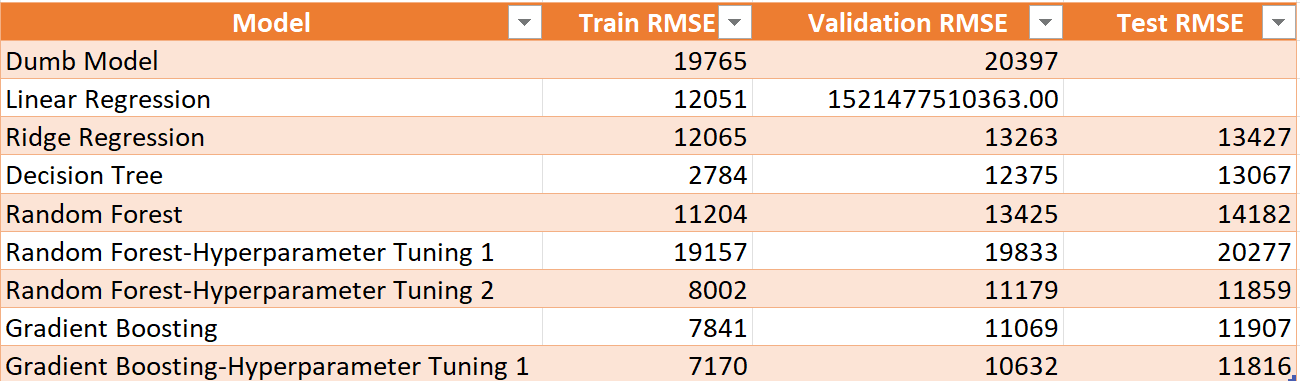

**Gradient Boosting Hyperparameter Tuning-1** gave us the best RMSE Values.

We have a RMSE value 7170 which is not bad considering the car price ranges, so a deviation of +- 8000 is acceptable when predicting the prices of a used car.

# **Future Work**

- Future work for this project could be more time spent with hyperparameter tuning to further improve the results.
- Additionally, some more feature engineering to provide the machine learning models with information to decrease the error.
- Further analysis can be done to uncover any attribute-error trends in order to determine which attributes cause the model to perform poorly.

# **References**

* Dataset: [US Used Cars Dataset(3 million Cars)](https://https://www.kaggle.com/ananaymital/us-used-cars-dataset)
* Opendatsets library: https://github.com/JovianML/opendatasets
* EDA project from scratch: https://www.youtube.com/watch?v=kLDTbavcmd0
* Machine Learning with Python: Zero to GBMs - https://zerotogbms.com
* Experiment tracking spreadsheet: https://bit.ly/mltrackingsheet
* kaggle dataset: https://www.kaggle.com/
* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
* opendatasets Python library: https://github.com/JovianML/opendatasets
* A big help for python and pandas functions: https://www.geeksforgeeks.org/
* A simple and easy way to learn python functions step by step: https://www.w3schools.com/python/

In [25]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
